<a href="https://colab.research.google.com/github/dltjdgh0428/DAP___/blob/main/Ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()
# 이 데이터 셋은 kaggle에 있는 2500가지의 라면의 점수를 메긴 데이터를 가져왔습니다.
# https://www.kaggle.com/residentmario/ramen-ratings/version/1?select=ramen-ratings.csv
# -이하 데이터셋 업로더의 의견
# 데이터 세트의 각 레코드는 단일 라면 제품 리뷰입니다. 
# 리뷰 넘버들은 연속되어 있다: 최근에 리뷰된 라면 종류들은 더 높은 수치를 가지고 있습니다.
# 브랜드, 품종(제품명), 국가 및 스타일(컵,그릇,쟁반과 같은)은 꽤 설명이 잘 됩니다. 
# 별표는 검토자가 평가한 라면 품질을 5점 척도로 나타내며,
# 데이터 세트에서 가장 중요한 열입니다! 
# Each record in the dataset is a single ramen product review. 
# Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. 
# Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. 
# Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale; 
# this is the most important column in the dataset!

Saving ramen-ratings.csv to ramen-ratings (1).csv


# 전 세계 라면에 대한 여러가지 분석을 시작합니다.

안녕하세요 201811712 이성호입니다. 저는 세계 라면의 데이터 셋을 이용하여 맛있는 라면의 특징을 알아보며, 맛있는 라면이 많은 나라 등 여러가지의 방향성으로 데이터를 분석해보았습니다. 감사합니다.

In [7]:
!pip install chart_studio &> /dev/null

In [8]:
import chart_studio.plotly as py
from plotly.offline import iplot
import plotly.graph_objects as go

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py


ramen_df = pd.read_csv('ramen-ratings.csv')
ramen_df = ramen_df.drop(['Review #'],axis=1)
ramen_df['Stars'] = ramen_df['Stars'].replace(['Unrated'],0)
ramen_df['Stars'] = ramen_df['Stars'].astype('float')
ramen_df

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN


In [10]:
ramen_df.Brand.unique()

array(['New Touch', 'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikok

In [12]:
ramen_df.Country.unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [13]:
sorted(ramen_df.Stars.unique())

[0.0,
 0.1,
 0.25,
 0.5,
 0.75,
 0.9,
 1.0,
 1.1,
 1.25,
 1.5,
 1.75,
 1.8,
 2.0,
 2.1,
 2.125,
 2.25,
 2.3,
 2.5,
 2.75,
 2.8,
 2.85,
 2.9,
 3.0,
 3.1,
 3.125,
 3.2,
 3.25,
 3.3,
 3.4,
 3.5,
 3.6,
 3.65,
 3.7,
 3.75,
 3.8,
 4.0,
 4.125,
 4.25,
 4.3,
 4.5,
 4.75,
 5.0]

In [14]:
ramen_df_Asia = ramen_df[ramen_df["Country"].isin(['Japan','India','Taiwan','South Korea','Singapore','Thailand', 'Hong Kong', 'Vietnam','Malaysia','Indonesia', 'China','Pakistan','Bangladesh','Nepal','Myanmar','Cambodia', 'Sarawak','Philippines','Dubai'])]
ramen_df_Africa = ramen_df[ramen_df["Country"].isin(['Ghana','Nigeria'])]
ramen_df_Europe = ramen_df[ramen_df["Country"].isin(['Germany', 'Hungary','UK','Netherlands','Finland','Sweden','Estonia','Holland','Poland'])]
ramen_df_America = ramen_df[ramen_df["Country"].isin(['USA','Mexico', 'Canada','Brazil','United States','Colombia'])]
ramen_df_Oceania = ramen_df[ramen_df["Country"].isin(['Fiji', 'Australia'])]
ramen_df_neighboringCountries = ramen_df[ramen_df["Country"].isin(['South Korea','Japan','China','Hong Kong','Taiwan','Thailand'])]
ramen_df_NonKorea = ramen_df[ramen_df["Country"].isin(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore','Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia','Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico','Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal','Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States','Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden','Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'])]

In [15]:
ramen_sort=ramen_df.sort_values(by=['Top Ten'], axis=0 ,ascending=False)
ramen_sort.head(10)

,Brand,Variety,Style,Country,Stars,Top Ten
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.0,2016 #9
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8
891,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.0,2016 #7
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.0,2016 #5
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1
1059,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.0,2015 #9
1114,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5.0,2015 #8
963,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.0,2015 #7
1072,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5.0,2015 #6


기본적으로 박스플랏을 이용하여 나라별 별점의 분포을 나타내어 보았습니다.

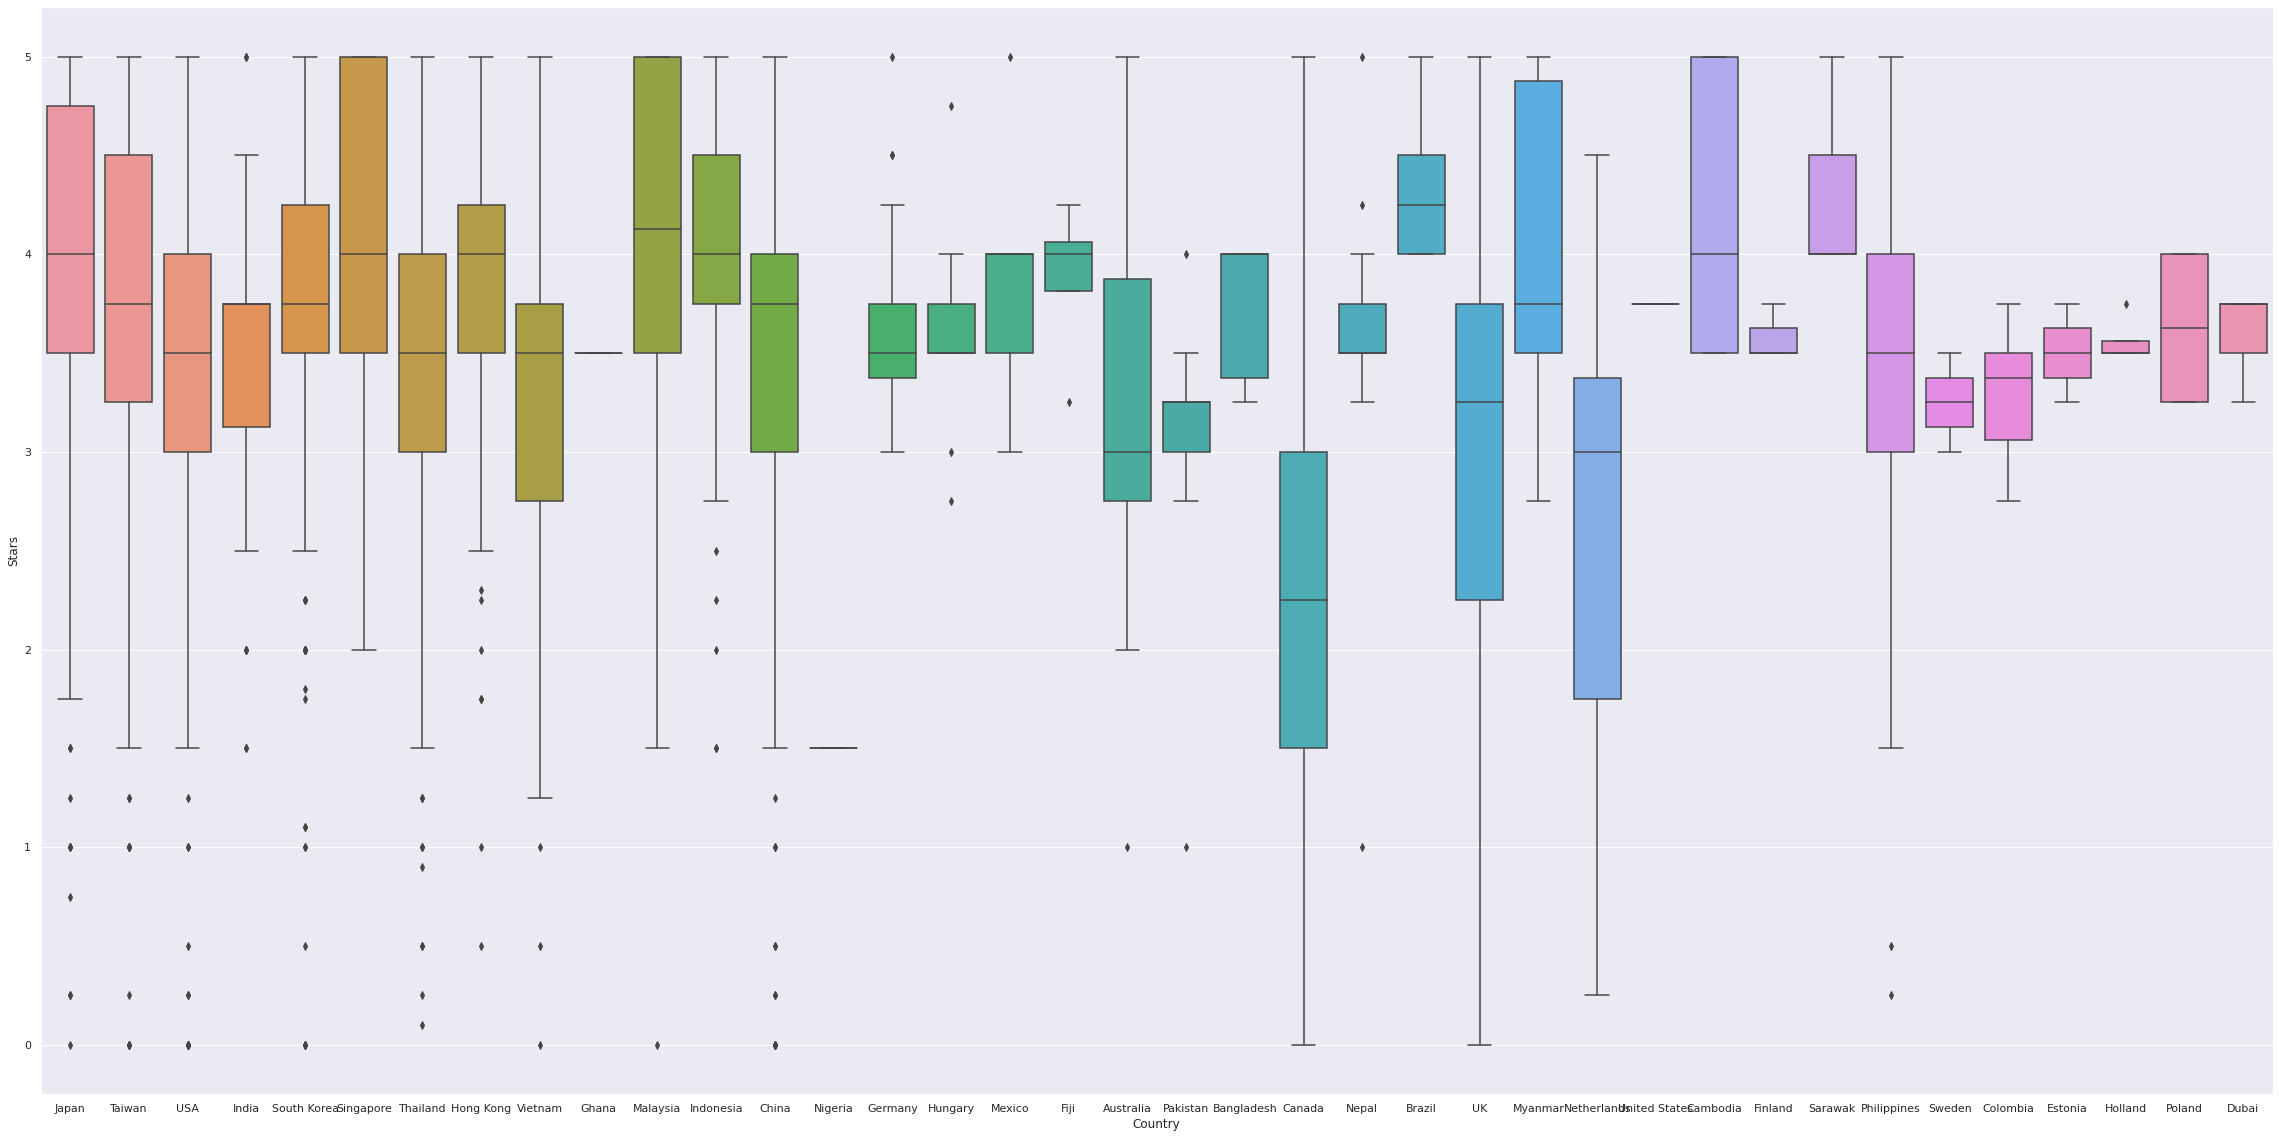

In [17]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(40,20)})
sns.boxplot(x="Country",
            y="Stars",
            data=ramen_df)
plt.show()

이후 데이터 세분화작업의 장점을 보여드리기위해 간단한 KDE플랏을 이용한 데이터 가시화입니다

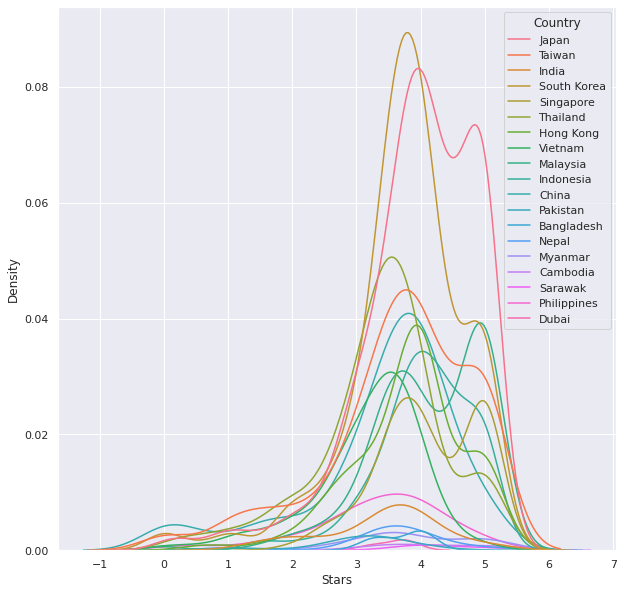

In [19]:
sns.kdeplot(data=ramen_df_Asia,x="Stars",hue="Country")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [ ]:
sns.kdeplot(data=ramen_df_Africa,x="Stars",hue="Country")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()
#아프리카 대륙 나라의 따른 별점 분포표입니다. 데이터 부족으로 표시되지 않습니다.

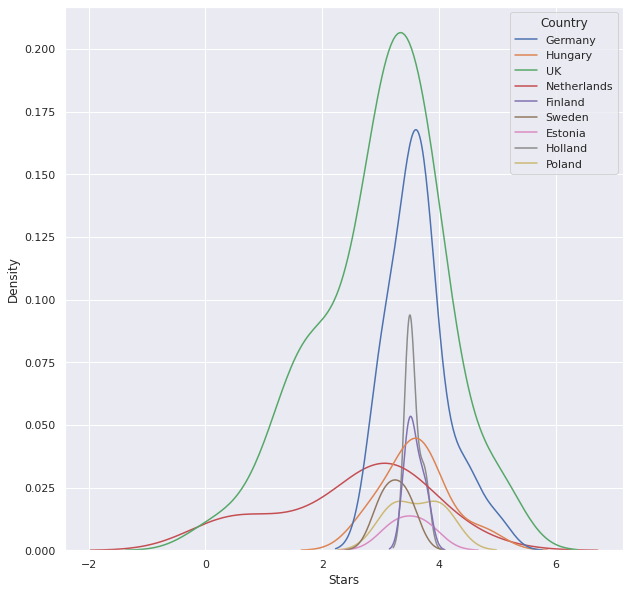

In [ ]:
sns.kdeplot(data=ramen_df_Europe,x="Stars",hue="Country")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()
#유럽 대륙 나라의 따른 별점 분포표입니다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



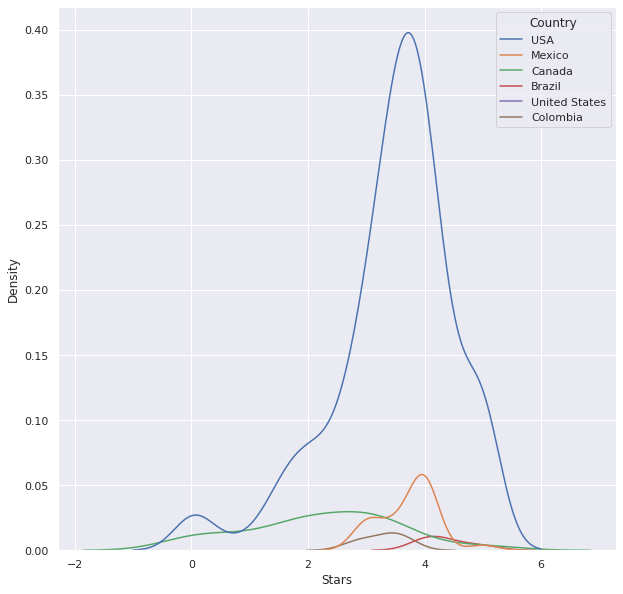

In [20]:
sns.kdeplot(data=ramen_df_America ,x="Stars",hue="Country")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()
#아메리카 대륙 나라의 따른 별점 분포표입니다.

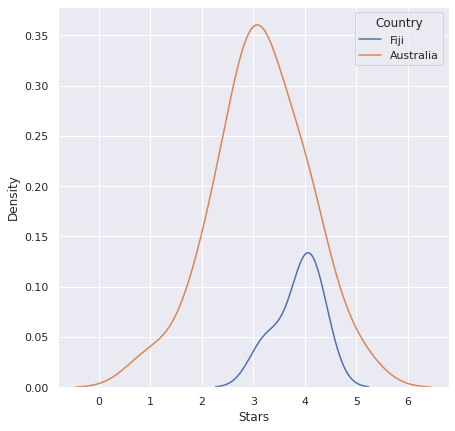

In [21]:
sns.kdeplot(data=ramen_df_Oceania ,x="Stars",hue="Country")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()
#오세아니아 대륙 나라의 따른 별점 분포표입니다.

In [22]:
#이 데이터 셋에서 책정된 점수의 분포입니다.
ramen_df.Stars.value_counts().head(10)

4.00    393
5.00    386
3.75    350
3.50    335
3.00    176
3.25    170
4.25    143
4.50    135
2.75     85
2.00     68
Name: Stars, dtype: int64

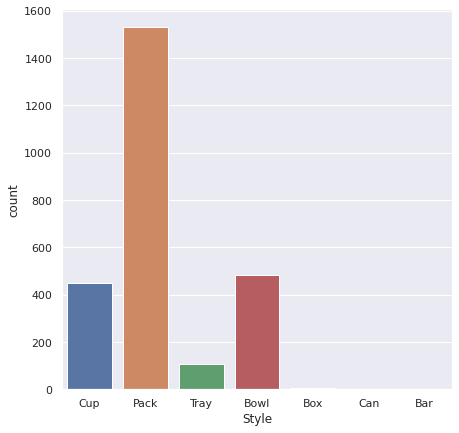

In [ ]:
#Style의 선호도를 알아보겠습니다.
sns.countplot(x='Style',data = ramen_df)

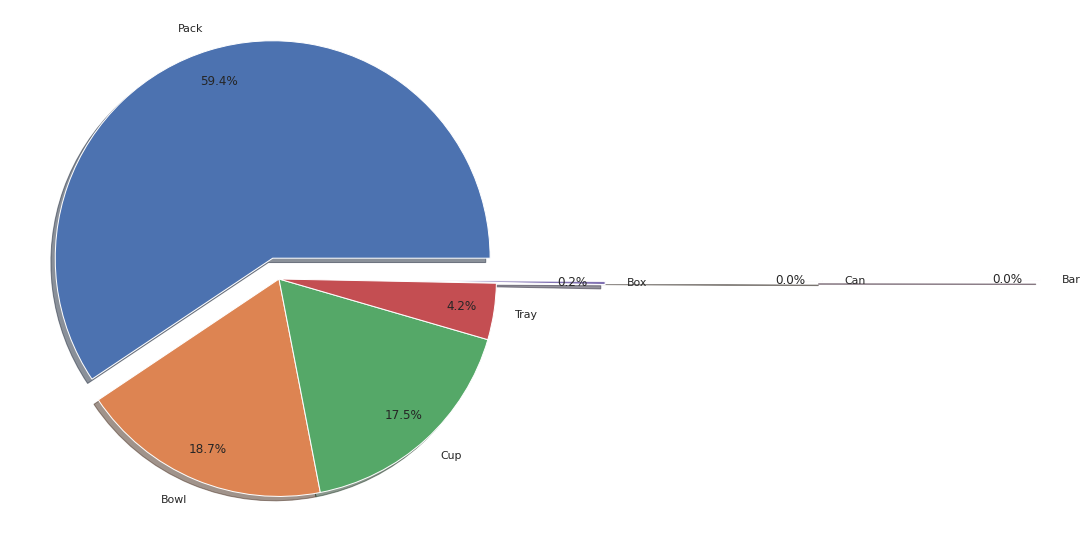

In [ ]:
#Style의 선호도를 알아보겠습니다. 파이그래프 버전입니다.
typeCount =ramen_df.Style.value_counts()
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(typeCount,
       labels=['Pack','Bowl','Cup','Tray','Box','Can','Bar'],
       autopct='%.1f%%',
       explode=[0.1 ,0, 0, 0,0.5,1.5,2.5],
       pctdistance = 0.85,
       shadow=True,
       )
plt.show()

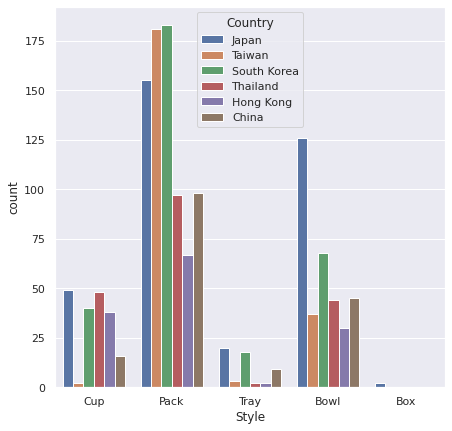

In [ ]:
# 전체를 일일이 나타내기 어려워 대표적으로 주변국들의 조리 방법 선호도를 알아보겠습니다.
sns.countplot(x='Style',data = ramen_df_neighboringCountries,hue="Country")

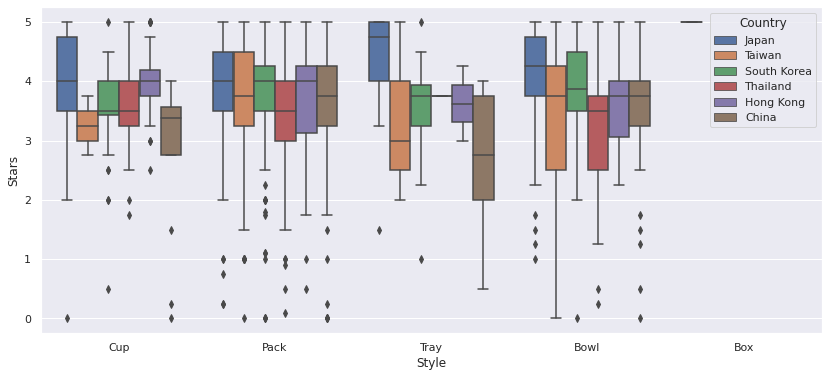

In [ ]:
# 조리 방법의 선호도와 별점의 상관 관계 분석
# 대표적으로 이웃 국가들입니다.
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(x="Style",
            y="Stars",
            hue='Country',
            data=ramen_df_neighboringCountries)
            
plt.show()

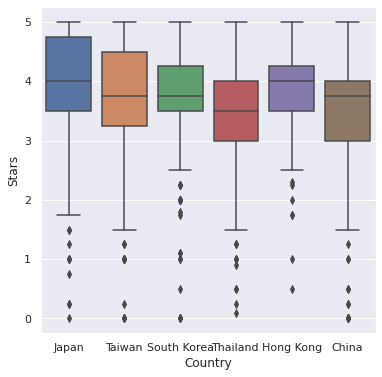

In [26]:
#위의 표화 함께 보면 어떤나라가 어느 라면스타일에서 강세를 보이는지 알수있다.
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(x="Country",
            y="Stars",
            data=ramen_df_neighboringCountries)
plt.show()

In [31]:
#다음은 좀더 세부적으로 브랜드별 별점 순위  top 15을 뽑겠습니다.
#브랜드 별 별점의 평균을 내림차순으로 출력
ramen_G = ramen_df.groupby(['Brand'], as_index=False).mean()
ramen_G_S = ramen_G.sort_values(by=['Stars'], axis=0,ascending=False)
ramen_G_S.head(15)

,Brand,Stars
99,Higashi,5.0
67,Foodmon,5.0
290,Tao Kae Noi,5.0
288,Takamori,5.0
182,MyOri,5.0
47,Daddy,5.0
48,Daifuku,5.0
197,Nyor Nyar,5.0
199,ORee Garden,5.0
213,Patanjali,5.0


In [32]:
#위의 순위는 정확도 측면에서 부족해보여서 라면 갯수가 10개이상인 브랜드들로만
#다시 데이터를 정제했습니다.
#1등은 비정상회담에도 나온 마이쿠알리 라면입니다. #말레이시아 똠양꿍
ramen_G =ramen_df.groupby('Brand').filter(lambda g: g['Brand'].size >= 10)
ramen_G_S = ramen_G.groupby(['Brand'], as_index=False).mean().sort_values(by=['Stars'], axis=0,ascending=False)
ramenTop5C = ramen_df[ramen_df['Brand'].isin(['MyKuali','Yamachan','KOKA',"Vit's",'ABC'])]
ramen_G_S.head(15)

,Brand,Stars
30,MyKuali,4.947917
58,Yamachan,4.568182
53,Vit's,4.211538
16,KOKA,4.210000
1,ABC,4.208333
38,Sakurai Foods,4.175000
45,Takamori Kosan,4.160714
28,Mi Sedaap,4.145833
8,Deshome,4.134615
57,Wugudaochang,4.125000


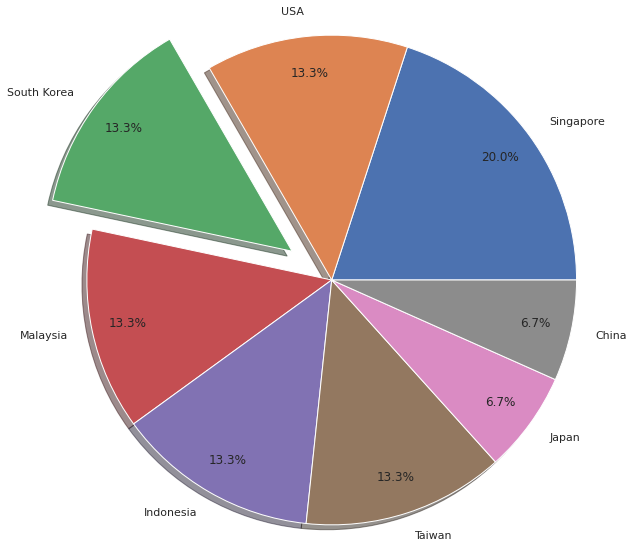

In [33]:
#맛있는 라면을 만드는 기업top15에 있는 나라의 분포도입니다.
RamenC = ramen_df[ramen_df["Brand"].isin(ramen_G_S.head(15)['Brand'])].drop_duplicates(['Brand'],keep='first')
typeCount =RamenC.Country.value_counts()
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(typeCount,
       labels=RamenC.Country.unique(),
       autopct='%.1f%%',
       pctdistance = 0.85,
       explode=[0,0,0.2,0,0,0,0,0],
       shadow=True
       )
plt.axis('equal')
plt.show()

In [39]:
#top15 라면회사에서만든 모든 라면 데이터입니다.
#강세를 띄는 기업 15가지의 라면 특징 패턴을 분석해보겠습니다.
Top15_Ramen_C=ramen_df[ramen_df["Brand"].isin(ramen_G_S.head(15)['Brand'])]
a=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Beef')].Stars.mean()
b=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Hot')].Stars.mean()
c=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Chicken')].Stars.mean()
d=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Pork')].Stars.mean()
e=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Potato')].Stars.mean()
f=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Gold')].Stars.mean()
g=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Curry')].Stars.mean()
h=Top15_Ramen_C[Top15_Ramen_C['Variety'].str.contains('Milk')].Stars.mean()

y=[a,b,c,d,e,f,g,h]
fig = go.Figure([go.Bar(x=['Beef','Hot','Chicken','Pork','Potato','Gold','Curry','Milk'],
                        y=y,
                        text=y ,
                        textposition='auto'
                        )])
fig.update_traces(marker_color='rgb(158,202,225)',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Best Brand Variety Report')
fig.show()

In [40]:
#이외에도 모든라면 카테고리도 한번 보겠습니다.
a=ramen_df[ramen_df['Variety'].str.contains('Beef')].Stars.mean()
b=ramen_df[ramen_df['Variety'].str.contains('Hot')].Stars.mean()
c=ramen_df[ramen_df['Variety'].str.contains('Chicken')].Stars.mean()
d=ramen_df[ramen_df['Variety'].str.contains('Pork')].Stars.mean()
e=ramen_df[ramen_df['Variety'].str.contains('Potato')].Stars.mean()
f=ramen_df[ramen_df['Variety'].str.contains('Gold')].Stars.mean()
g=ramen_df[ramen_df['Variety'].str.contains('Curry')].Stars.mean()
h=ramen_df[ramen_df['Variety'].str.contains('Milk')].Stars.mean()
y=[a,b,c,d,e,f,g,h]
fig = go.Figure([go.Bar(x=['Beef','Hot','Chicken','Pork','Potato','Gold','Curry','Milk'],
                        y=y,
                        text=y ,
                        textposition='auto'
                        )])
fig.update_traces(marker_color='rgb(158,202,225)',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='All Brand Variety Report')
fig.show()

어느 기업에서 만드냐도 중요하지만
특정 재료는 검증이 되었다는 것을 알게됐습니다,

In [41]:
#1등 기업의 데이터와 평균 라면의 별점을 비교한 표입니다
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = ramen_df[ramen_df['Brand'].isin(['MyKuali'])]["Stars"].mean(),
    mode = "gauge+number+delta",
    title = {'text': "Stars"},
    delta = {'reference': ramen_df["Stars"].mean()},
    gauge = {'axis': {'range': [None, 5]},
             'steps' : [
                 {'range': [0, 2.5], 'color': "lightgray"},
                 {'range': [2.5, 4], 'color': "gray"}],
             'threshold' : {'line': {'color': "yellow", 'width': 4},
             'thickness': 0.50, 'value': ramen_df["Stars"].mean()}}))


fig.show()

In [42]:
#top5의 점수 분포를 히스토 그램으로 나타내 보았습니다.
import plotly.graph_objects as go
fig = px.histogram(ramenTop5C,
                   x="Stars",
                   y="Brand",
                   color="Brand",
                   marginal="violin",
                   hover_data=ramenTop5C.columns)
fig.show()

In [43]:
#top 5의 라면의 스타일과 점수의 상관관계를 히스토그램으로 나타내보았습니다.
import plotly.graph_objects as go
fig = px.histogram(ramenTop5C,
                   x="Stars",
                   y="Style",
                   color="Style",
                   marginal="violin",
                   hover_data=ramenTop5C.columns)
fig.show()
#대체적으로 pack라면이 더욱 상위점수대에 머물고있지만 bowl의 경우가 빈도수대비 고득점율이
#더 높다는것을 알 수 있습니다.

이제부터 top10에 들어있던 라면으로 인기가 있는 라면의 공통점을 분석해보겠습니다.

In [ ]:
TopRamenDf=ramen_df.dropna(axis=0)
#drop_duplicates은 \n이라는 더미데이터가 있어서 정제했습니다.
TopRamenDf=TopRamenDf.drop_duplicates(['Top Ten'],keep=False)
TopRamenDf.sort_values(by=['Top Ten'], axis=0).head(5)

,Brand,Variety,Style,Country,Stars,Top Ten
2475,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.0,2012 #1
1972,Koka,Spicy Black Pepper,Pack,Singapore,5.0,2012 #10
2533,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.0,2012 #2
2188,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.0,2012 #3
2567,Sapporo Ichiban,Chow Mein,Pack,Japan,5.0,2012 #4


In [ ]:
TopRamenDf.Country.value_counts()

Singapore      7
Malaysia       6
Japan          6
South Korea    5
Indonesia      4
Thailand       3
Taiwan         2
Myanmar        1
China          1
Hong Kong      1
USA            1
Name: Country, dtype: int64

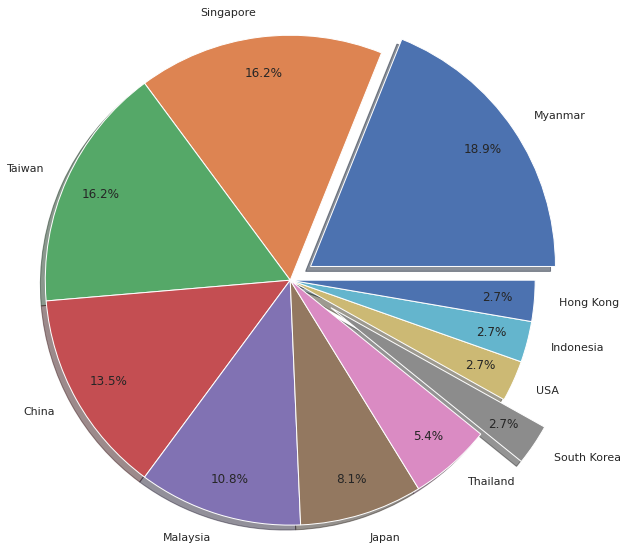

In [ ]:
#지금까지 top10에들었던 라면들의 나라 분포도입니다.

typeCount =TopRamenDf.Country.value_counts()
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(typeCount,
       labels=TopRamenDf.Country.unique(),
       autopct='%.1f%%',
       pctdistance = 0.85,
       explode=[0.1,0,0,0,0,0,0,0.2,0,0,0],
       shadow=True
       )
plt.axis('equal')
plt.show()

# 결론

전 세계 적으로 pack라면이 가장 많은 수로 시장을 점유하고 있으며 동아시아권 이외에도 라면에 대한 관심도는 상당한 것으로 알 수 있습니다, 또한 라면의 브랜드도 맛있는 라면을 먹을 때 좋은 선택지를 알려주지만 특정 재료는 어디든 맛있는 효과를 낼 수 있다는 것도 알 수 있었습니다. 감사합니다